# 《交通数据处理方法》实验2

###                     1173200618 赵沛霖

## 0  加载Pandas、Numpy、Matplotlib 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 读取并查看数据 

In [2]:
# 读取数据
from sklearn.datasets import load_digits
digits=load_digits()
X=digits.data
y=digits.target

#### 其中X是64维的数据（8×8像素点），y是对应的数字。因此将X和Y（也就是data和target分开来查看比较合适） 

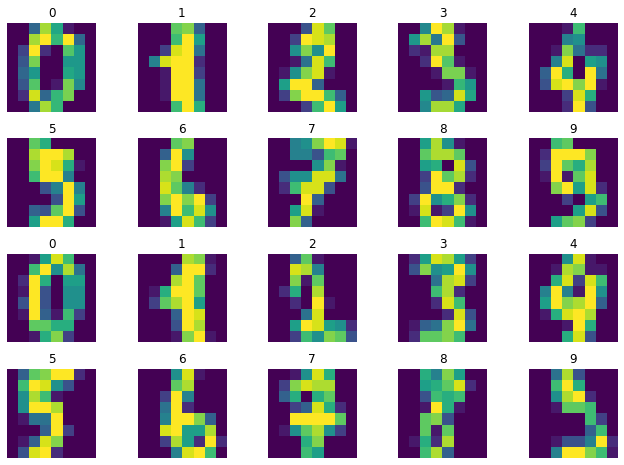

In [3]:
#查看X的前20个数字图像文件，再将其与y进行对比，这里采用Matplotlip将其绘制出来
fig,ax=plt.subplots(4,5,figsize=(10, 8))
fig.subplots_adjust(right=1,hspace=0.3)
k=0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(X[k].reshape((8, 8)))           
        ax[i,j].set_title(y[k])
        k+=1;
        ax[i,j].axis('off')

#### 通过这样的对照查看，我们会发现即使是用人眼进行分辨对照，也会有一定的难度。那么机器的表现如何呢？尽请期待…… 

## 2 数据预处理 

### 2.1 查看重复值及缺失值 

In [4]:
#将numpy的array矩阵转为pandas的DataFrame，便于之后的分析
df=pd.DataFrame(X)
df['y']=y
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [5]:
#查看重复值
df[df.duplicated()==True]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y


In [6]:
#查看缺失值
df[df.isnull().values==True]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y


#### sklearn自带的示例数据集就是完美，没有重复值也没有缺失值 

### 2.2 数据标准化

#### 对于本数据集是不需要的，因为X作为特征集，其量纲全是像素，因此不需要数据标准化或者归一化 

### 2.3 数据降维——主成分分析（PCA）

#### 降维非常重要，因为通过绘制X的图像我们可以看出，好多像素点都是没用的（也就是这些维度是没有用的）。尤其是每一个图像四个角落的一些像素点，它们一直都是黑的（值为0），这样的话在建模的时候一定会出现数据冗余，因此需要做降维处理。 

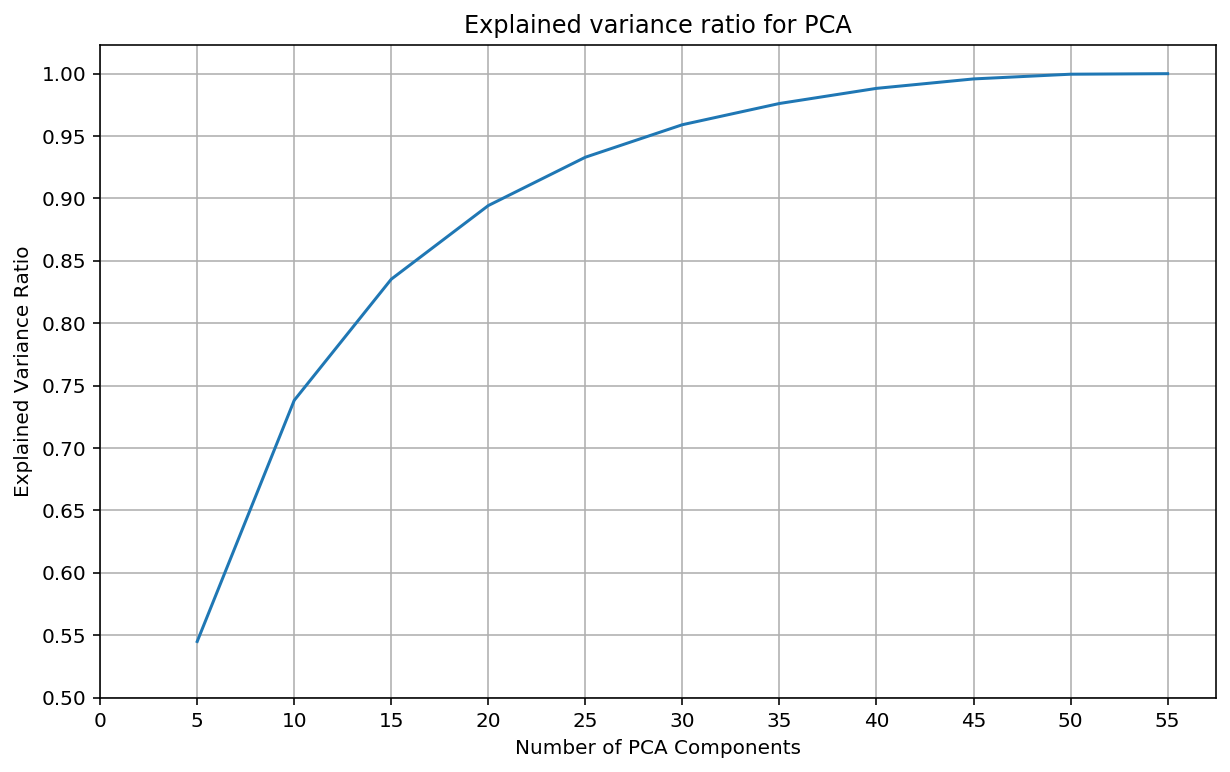

In [7]:
#寻找PCA降维所保留的最优特征个数
from sklearn.decomposition import PCA

candidate_components = range(5, 60, 5)
explained_ratios = []
for c in candidate_components:
    pca = PCA(n_components=c, random_state=0)
    X_pca = pca.fit_transform(X)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))

fig,ax=plt.subplots(1,1,figsize=(10, 6), dpi=144)
ax.grid()
ax.plot(candidate_components, explained_ratios)
ax.set_xlabel('Number of PCA Components')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained variance ratio for PCA')
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
ax.set_xticks(np.arange(0, 60, 5));

#### 通过观察解释方差比，最终决定保留20个特征值。

In [8]:
model = PCA(n_components=20,random_state=0) #random_state和前一步的random_state一样，说明参与计算的数据相同
X_transform = model.fit_transform(X)
X_transform.shape

(1797, 20)

#### 由于对所有数据集进行PCA降维，会造成在之后的划分训练集与测试集的时候产生信息泄露问题。因此，在这里进行PCA降维处理的目的是查看数据集的保留多少特征比较合适，而通过看图我们可以知道保留20个特征比较合适。

## 3 模型训练 

### 3.1 划分训练及测试集 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3.2 线性回归模型 

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression();

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))

train_score: 0.602432; cv_score: 0.545239


#### 很显然，线性回归的这个评分太低，所以不采用此模型
#### 因此也不用对线性模型进行PCA降维（对训练集）、交叉验证或者绘制学习曲线的工作了。 

### 3.3 多项式回归  

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

for i in range(1,4):
    model = polynomial_model(degree=i)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    cv_score = model.score(X_test, y_test)
    print('阶数: {0:.0f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(i,train_score, cv_score))

阶数: 1; train_score: 0.602423; cv_score: 0.545428
阶数: 2; train_score: 0.998021; cv_score: -1051033920763886464.000000
阶数: 3; train_score: 1.000000; cv_score: 0.739503


####  这里我用了1到3阶多项式模型去训练我们的训练集。从中我们发现，1阶性能不好；2阶模型，因为训练评分远大于测试评分，因此出现过拟合现象；3阶模型，同样出现了过拟合现象。因此需要去除过拟合，方法很多，这里采用PCA对训练集降维

In [12]:
from sklearn.decomposition import PCA

model = PCA(n_components=.9,random_state=1)
X_train_transform = model.fit_transform(X_train)
X_train_transform.shape

(1437, 21)

#### 通过对训练集进行降维操作，我们保留了21个特征值，使其解释方差比达到90%

In [13]:
#接着我们需要对测试集进行处理
X_test_transform = model.transform(X_test)
X_test_transform.shape

(360, 21)

#### 根据降维之后的训练集进行模型的训练  

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

for i in range(1,4):
    model = polynomial_model(degree=i)
    model.fit(X_train_transform, y_train)
    train_score = model.score(X_train_transform, y_train)
    cv_score = model.score(X_test_transform, y_test)
    print('阶数: {0:.0f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(i,train_score, cv_score))

阶数: 1; train_score: 0.503338; cv_score: 0.453258
阶数: 2; train_score: 0.906302; cv_score: 0.845198
阶数: 3; train_score: 1.000000; cv_score: 0.655430


#### 从中我们发现二阶模型的训练得分和测试得分都比较高，而且相比于三阶模型过拟合的程度较低，因此选用二阶模型对降维后的数据进行处理 

### 3.4 支持向量机 

In [15]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
score_rbf = svc_rbf.score(X_test, y_test)
score_rbf

0.9916666666666667

#### 支持向量机的评分居然达到了0.992几乎接近了满分！ 

In [16]:
svc_rbf.fit(X_train_transform, y_train)
score_rbf = svc_rbf.score(X_test_transform, y_test)
score_rbf

0.9888888888888889

#### 用支持向量机对降维后的数据进行建模，发现评分降低。
#### 这也非常好解释，原因在于PCA降维使得信息减少，利用减少的信息进行建模所得到的评分必然会变小
#### 同时支持向量机模型是不怕维度过高的，因为其原理就是把数据集的维度扩展到无穷维，再利用核函数进行处理，因此他在某种程度上不怕高维度

In [17]:
svc_rbfl = SVC(kernel='linear')
svc_rbfp = SVC(kernel='poly')

svc_rbfl.fit(X_train, y_train)
svc_rbfp.fit(X_train, y_train)

score_rbfl = svc_rbfl.score(X_test, y_test)
score_rbfp = svc_rbfp.score(X_test, y_test)

print('线性核函数评分: {0:0.6f}; 多项式核函数评分: {1:.6f}'.format(score_rbfl, score_rbfp))

线性核函数评分: 0.977778; 多项式核函数评分: 0.988889


#### 所以说rbf核函数的效果更好，为了使其效果更好，我们利用网格搜索对核函数为rbf函数的svm模型进行优化 

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

param_grid = dict(gamma=gamma_range, C=C_range)

svc = SVC()
gs = GridSearchCV(estimator=svc, param_grid = param_grid, scoring='accuracy',cv=5,return_train_score=True)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

({'C': 1.0, 'gamma': 0.001}, 0.9909528648857917)

#### 通过网格搜索我们发现，尽管给定了许多参数，但是仍然你没有默认值0.9916666666666667高，因此我们采用的默认值为我们的最优参数 

### 3.5 逻辑回归 

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.995825; test score: 0.950000


#### 模型在一定程度上出现过拟合现象，因此依旧采用降维方式进行处理 

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train_transform, y_train)

train_score = model.score(X_train_transform, y_train)
test_score = model.score(X_test_transform, y_test)
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.967293; test score: 0.952778


#### 降维之后的测试得分明显变高 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=2, penalty='l1', solver='liblinear')

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))

train_score: 1.000000; cv_score: 0.983333


#### 利用多项式函数进行逻辑回归之后，发现评分变高，但仍存在一定的过拟合，因此用降维数据进行处理 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=2, penalty='l1', solver='liblinear')

model.fit(X_train_transform, y_train)

train_score = model.score(X_train_transform, y_train)
cv_score = model.score(X_test_transform, y_test)
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))

train_score: 1.000000; cv_score: 0.980556


#### 我们发现对进行降维的数据进行建模之后，测试得分反而降低，因此我们仍利用原数据进行网格搜索优化模型

In [28]:
from sklearn.model_selection import GridSearchCV

degree = [1,2,3]
solver = ['liblinear']
penalty = ['l1','l2']

param_grid = dict(polynomial_features__degree=degree,
                  logistic_regression__solver=solver,
                  logistic_regression__penalty=penalty)

model = polynomial_model()
gs = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy',cv=10,return_train_score=True)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

({'logistic_regression__penalty': 'l2',
  'logistic_regression__solver': 'liblinear',
  'polynomial_features__degree': 3},
 0.9881750194250195)

#### 在这里我们只进行degree和solver的网格搜索最优化，原因为对于'lbfgs'没有l1正则化方式，而且l2正则化方式普遍表现较好，因此没有对penlty进行选择（均为默认的l2）。同时，我们发现逻辑回归模型的最优评分为0.988左右，和svm的0.991667相比，svm仍为最理想的模型

### 3.6 决策树 

In [29]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 1.0; test score: 0.8444444444444444


#### 通过这个训练的得分和测试得分，我们可以清晰地看出模型出现过拟合，需要进一步处理 

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_transform, y_train)
train_score = clf.score(X_train_transform, y_train)
test_score = clf.score(X_test_transform, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 1.0; test score: 0.8305555555555556


#### 通过降维的方法进行去除过拟合的效果不好，我们只能通过限制树的高度、叶子节点数等方法进行过拟合的处理 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters={'criterion': ['entropy','gini'],
            'min_samples_split' : list(range(2,13)),
            'max_depth': list(range(2,10)),
            'min_samples_leaf':list(range(1,10))}

dtc = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dtc, param_grid = parameters, scoring='accuracy',cv=10,return_train_score=True)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

({'criterion': 'entropy',
  'max_depth': 8,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.8628885003885005)

#### 通过网格搜索优化模型，我们可以确定出按照信息增益方式，树最大深度为8，需要在叶子结点上的最小样本数量为1，分割内部节点所需要的最小样本数量为2。 但是，基于之前实验的经验，基于Bagging+决策树的随机森林会比决策树有更好的效果，因此对决策树模型的进一步优化就讨论到这里

### 3.7 随机森林 

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)

print("Train_score:{0:.6f}; Test_score:{1:.6f}".format(train_score,test_score))

Train_score:1.000000; Test_score:0.966667


#### 通过这个测试评分，很好的印证了我的话，随机森林效果比决策树效果好很多
#### 同时，通过这个训练得分和测试得分的对比我们可以看出模型还是在一定程度上过拟合了，需要进一步处理

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train_transform,y_train)
train_score=clf.score(X_train_transform,y_train)
test_score=clf.score(X_test_transform,y_test)

print("Train_score:{0:.6f}; Test_score:{1:.6f}".format(train_score,test_score))

Train_score:1.000000; Test_score:0.955556


#### 通过测试得分我们可以看出，其实PCA降维对随机森林模型效果的影响不大，还是需要基于其内部的参数进行调整 

In [44]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion' : ['entropy','gini'],
            'n_estimators' : list(range(50,500,50)),
            'min_samples_split' : list(range(2,5)),
            'max_depth': list(range(2,15)),
            'min_samples_leaf':list(range(1,3))}

rfc = RandomForestClassifier()
gs = GridSearchCV(estimator=rfc, param_grid = parameters, scoring='accuracy',cv=10,return_train_score=True)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

({'criterion': 'entropy',
  'max_depth': 14,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 400},
 0.9791132478632478)

#### 本次网格搜索历时三个小时，经过网格搜索优化模型，我们发现随机森林的最佳评分为0.97911，也是一个非常理想的模型。 

### 3.8 Adaboost 

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=2, min_samples_leaf=1)

clf=AdaBoostClassifier(base_estimator=dtc,n_estimators=400)
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)

print("Train_score:{0:.6f}; Test_score:{1:.6f}".format(train_score,test_score))

Train_score:1.000000; Test_score:0.980556


#### 因为Adaboost的默认模型是决策树，而且我们之前利用决策树模型也已经进行过最优化处理，因此直接利用最优决策树的超参数值进行拟合；其中，拟合的次数我们利用随机森林里最优超参数，即n_estimators=400

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=2, min_samples_leaf=1)

clf=AdaBoostClassifier(base_estimator=dtc,n_estimators=400)
clf.fit(X_train_transform,y_train)
train_score=clf.score(X_train_transform,y_train)
test_score=clf.score(X_test_transform,y_test)

print("Train_score:{0:.6f}; Test_score:{1:.6f}".format(train_score,test_score))

Train_score:1.000000; Test_score:0.977778


#### 再利用 Adaboost对PCA降维之后的数据进行建模，发现没有之前的模型评分高

In [57]:
from sklearn.ensemble import AdaBoostClassifier

svc=SVC(kernel='rbf')
clf=AdaBoostClassifier(base_estimator = svc,n_estimators = 100,algorithm = 'SAMME')
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)

print("Train_score:{0:.6f}; Test_score:{1:.6f}".format(train_score,test_score))

Train_score:0.107168; Test_score:0.080556


#### 我们尝试用Adaboost算法对之前评分最好的模型——svm模型，进行集成; 发现效果奇差！！ 

In [90]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression (penalty='l2', solver='liblinear')

clf=AdaBoostClassifier(base_estimator = model,n_estimators = 400)
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)

print("Train_score:{0:.6f}; Test_score:{1:.6f}".format(train_score,test_score))

Train_score:0.931106; Test_score:0.913889


#### 在尝试用Adaboost算法对逻辑回归模型进行集成，（线性）逻辑回归模型的评分同样下降

### 3.9 Bagging 

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
class ZPL_Bagging():

    def __init__(self, model,n_estimators):

        self.model = model
        self.n_estimators = n_estimators 

        self.results = []
 
        for _ in range(self.n_estimators):
            result = model()
            self.results.append(result)

    def fit(self, X, Y):
        
        sub_sets = self.ZiZhuCaiYang(X, Y)
        n_features = X.shape[1] 

        for i in range(self.n_estimators):
            sub_X, sub_Y = sub_sets[i]
            self.results[i].fit(sub_X, sub_Y)       

    def predict1(self, X):
        y_preds = []
        for i in range(self.n_estimators): 
            sub_X = X 
            y_pre = self.results[i].predict(sub_X) 
            y_preds.append(y_pre) 
        y_preds = np.array(y_preds).T 
        #print(y_preds)
        y_pred = []
        for y_p in y_preds:         
            y_pred.append(np.bincount(y_p.astype('int')).argmax())
        return y_pred

    def ZiZhuCaiYang(self, X, Y):

        m = X.shape[0] 
        Y = Y.reshape(m, 1)

        X_Y = np.hstack((X, Y)) 
        np.random.shuffle(X_Y) 

        data_sets = []
        for _ in range(self.n_estimators):
            nm = np.random.choice(m, m, replace=True) 
            New_X_Y = X_Y[nm, :] 
            New_X = New_X_Y[:, :-1]
            New_Y = New_X_Y[:, -1:]
            data_sets.append([New_X, New_Y])
        return data_sets

if __name__ == '__main__':

    clf = ZPL_Bagging(LogisticRegression,n_estimators=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict1(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    clf = ZPL_Bagging(SVC,n_estimators=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict1(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the 

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the 

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the 

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the 

Accuracy: 0.9722222222222222


E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Accuracy: 0.9916666666666667


#### 这里采用自己编程的方式实现Bagging算法，通过Bagging集成，逻辑回归（线性）的准确率上升到了0.9722，而svm依旧是非常高0.991667  

### 3.10 神经网络

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),batch_size=1,alpha=0.01) 
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print('train_score: {0:0.6f}; test_score: {1:.6f}'.format(train_score, test_score))

train_score: 0.997912; test_score: 0.975000


#### 神经网络在图像处理方面是比较热门的，通过结果我们可以看出模型的得分还是挺高的。因为模型的过拟和情况不严重，因此不再对降维之后的数据集进行模型训练了，而是直接通过网格搜索优化模型进行模型优化

In [87]:
params = {'hidden_layer_sizes':[(50,),(100,),(100,100),(150,100),(150,150),(200,150),(200,200)],
          'alpha':[0.0001,0.001,0.01,0.1,1]}
grid = GridSearchCV(MLPClassifier(max_iter=2500,random_state=0),param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_score_, grid.best_params_

(0.9839963221060781, {'alpha': 1, 'hidden_layer_sizes': (100,)})

#### 通过模型的优化，我们找到了最优参数。在这里必须说明的一点是，我必须要进行迭代次数的设定，否则计算过程会耗费非常多的时间

### 3.11 KNN 

In [94]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights", KNeighborsClassifier(n_neighbors=2, weights="distance")))

results = []
for name, model in models:
    model.fit(X_train, y_train)
    results.append((name, model.score(X_test, y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

name: KNN; score: 0.9805555555555555
name: KNN with weights; score: 0.9888888888888889


#### 通过比较发现，KNN模型及带权重的KNN模型效果也是非常好的。这也非常好解释，因为所有的X都是像素点的位置，正是他们的位置的不同造成了不同的数字，因此通过他们的位置及距离对他们进行分类的效果不会太差 

In [99]:
knn = KNeighborsClassifier(n_neighbors=2, weights="distance")
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

train score: 1.0; test score: 0.9888888888888889


In [100]:
knn = KNeighborsClassifier(n_neighbors=2, weights="distance")
knn.fit(X_train_transform, y_train)
train_score = knn.score(X_train_transform, y_train)
test_score = knn.score(X_test_transform, y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

train score: 1.0; test score: 0.9861111111111112


#### 通过上述对原始数据和做降维处理的数据进行模型的比较，发现对原始数据的建模评分比较高 

## 4 学习曲线的绘制 

#### 通过建模的过程及模型的评分过程，我们可以看到svm的模型性能最佳，而线性回归模型、多项式回归模型、决策树模型的性能是较差的，基本是要被pass掉的，所以也对其进行交叉验证和学习曲线的绘制了。 

### 4.1 支持向量机模型的交叉验证及学习曲线的绘制 

In [130]:
#svm 交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=1.0, gamma=0.001)
cross_val_score(svc, X, y, scoring='accuracy', cv=10).mean()

0.9782929857231533

#### 通过对整个X和y进行交叉验证之后，我们发现svm的准确率为0.9782929857
#### 这里注意之前的模型评分基本上都用的是拟合优度（r^2)，这里用的准确率，因此存在差异

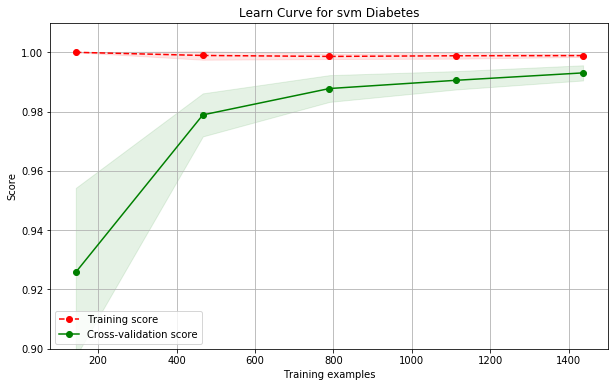

In [115]:
from sklearn.model_selection import ShuffleSplit
from common.utils import plot_learning_curve

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
fig,ax=plt.subplots(1,1,figsize=(10, 6))
plot_learning_curve(ax, svc, "Learn Curve for svm Diabetes", X, y, ylim=(0.90, 1.01), cv=cv);

#### 但是通过学习曲线的绘制，我们发现svm的评分已经超过0.99

### 4.2 逻辑回归模型的交叉验证及学习曲线的绘制  

In [116]:
model = polynomial_model(degree=3, penalty='l2', solver='liblinear')
cross_val_score(model, X, y, scoring='accuracy', cv=10).mean()

0.9755214152700186

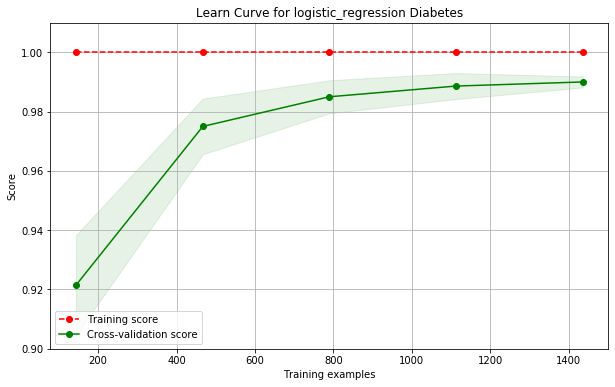

In [117]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
fig,ax=plt.subplots(1,1,figsize=(10, 6))
plot_learning_curve(ax, model, "Learn Curve for logistic_regression Diabetes", X, y, ylim=(0.90, 1.01), cv=cv);

### 4.3 随机森林模型的交叉验证及学习曲线绘制

In [119]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=14,min_samples_leaf=1,min_samples_split=2,n_estimators=400)
cross_val_score(rfc, X, y, scoring='accuracy', cv=10).mean()

0.9504686530105524

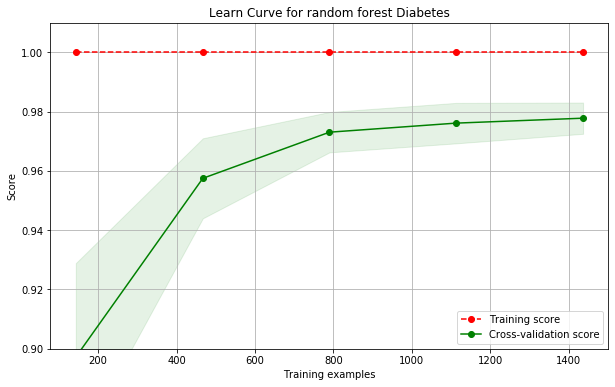

In [120]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
fig,ax=plt.subplots(1,1,figsize=(10, 6))
plot_learning_curve(ax, rfc, "Learn Curve for random forest Diabetes", X, y, ylim=(0.90, 1.01), cv=cv);

### 4.4 Adaboost模型的交叉验证及学习曲线绘制

In [121]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=2, min_samples_leaf=1)
ada=AdaBoostClassifier(base_estimator=dtc,n_estimators=400)
cross_val_score(rfc, X, y, scoring='accuracy', cv=10).mean()

0.9526970825574177

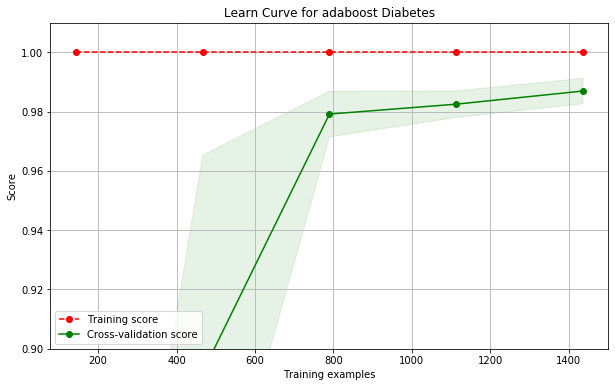

In [123]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
fig,ax=plt.subplots(1,1,figsize=(10, 6))
plot_learning_curve(ax, ada, "Learn Curve for adaboost Diabetes", X, y, ylim=(0.90, 1.01), cv=cv);

### 4.5  Bagging模型的交叉验证及学习曲线绘制

In [127]:
from sklearn.ensemble import BaggingClassifier

svm = SVC(kernel='rbf',C=1.0, gamma=0.001)
bag = BaggingClassifier(svm,n_estimators=100)
cross_val_score(bag, X, y, scoring='accuracy', cv=10).mean()

0.9577574253103986

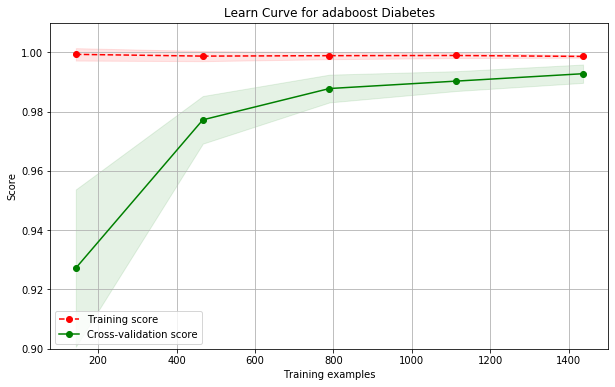

In [128]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
fig,ax=plt.subplots(1,1,figsize=(10, 6))
plot_learning_curve(ax, bag, "Learn Curve for adaboost Diabetes", X, y, ylim=(0.90, 1.01), cv=cv);

### 4.6  神经网络模型的交叉验证及学习曲线绘制

In [131]:
mlp = MLPClassifier(alpha=1, hidden_layer_sizes=(100,))
cross_val_score(mlp, X, y, scoring='accuracy', cv=10).mean()

E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklear

0.9515704531346989

E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklear

E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklear

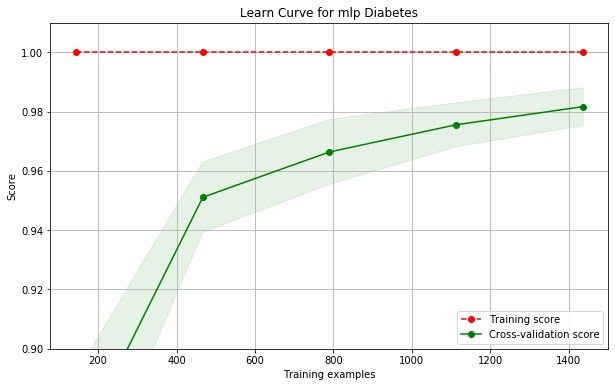

In [132]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
fig,ax=plt.subplots(1,1,figsize=(10, 6))
plot_learning_curve(ax, mlp, "Learn Curve for mlp Diabetes", X, y, ylim=(0.90, 1.01), cv=cv);

### 4.7 KNN模型的交叉验证及学习曲线绘制 

In [133]:
cross_val_score(knn, X, y, scoring='accuracy', cv=10).mean()

0.974407200496586

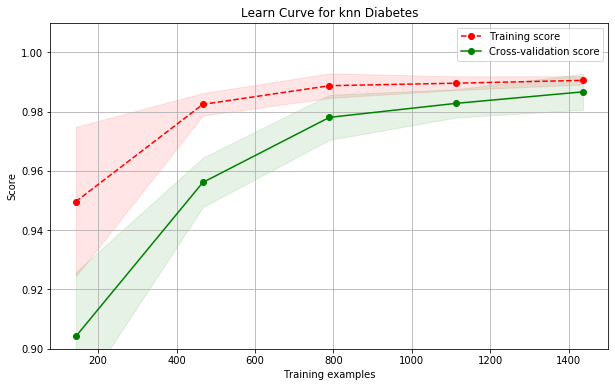

In [135]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
fig,ax=plt.subplots(1,1,figsize=(10, 6))
plot_learning_curve(ax, knn, "Learn Curve for knn Diabetes", X, y, ylim=(0.90, 1.01), cv=cv);